In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
files = ['normal_sky_sub_2009oct30_0009.fits_flux.dat', \
         'normal_sky_sub_2009oct30_0010.fits_flux.dat', \
         'normal_sky_sub_2009oct30_0011.fits_flux.dat']

In [6]:
master_pix, all_fl, all_fle = np.loadtxt(files[0], usecols=(0,1,2), unpack=True)

for i in range(len(files)-1):
    fl1, fle1 = np.loadtxt(files[i+1], usecols=(1,2), unpack=True)
    all_fl = np.vstack((all_fl, fl1))
    all_fle = np.vstack((all_fle, fle1))

print(all_fl.shape)
print(all_fle[:,0].shape)

(3, 901)
(3,)


In [10]:
master_fl = np.mean(all_fl, axis=0)
master_fle = np.array([])
print(len(all_fle[0]))
for i in range(len(all_fle[0])):
    fel11 = np.sum(all_fle[:,i]**2)/len(all_fle[:,i])
    master_fle = np.hstack((master_fle, fel11))

print(master_fl.shape)
print(master_fle.shape)

901
(901,)
(901,)


<ErrorbarContainer object of 3 artists>

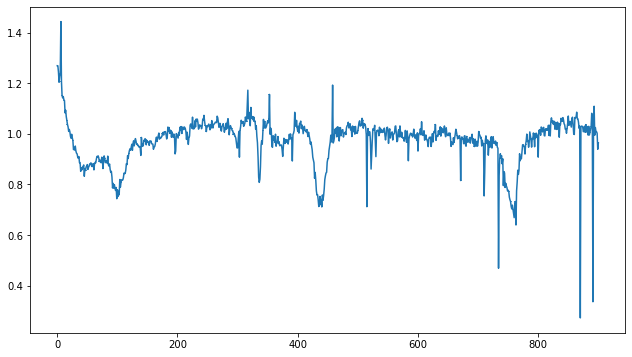

In [11]:
plt.figure(figsize=(16/1.5, 9/1.5))
plt.errorbar(master_pix, master_fl, yerr=master_fle)

<ErrorbarContainer object of 3 artists>

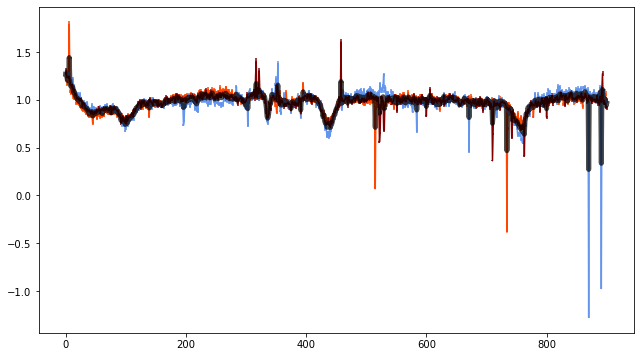

In [17]:
files_fl1, files_fle1 = np.loadtxt(files[0], usecols=(1,2), unpack=True)
files_fl2, files_fle2 = np.loadtxt(files[1], usecols=(1,2), unpack=True)
files_fl3, files_fle3 = np.loadtxt(files[2], usecols=(1,2), unpack=True)

plt.figure(figsize=(16/1.5,9/1.5))

plt.errorbar(master_pix, files_fl1, yerr=files_fle1, c='orangered')
plt.errorbar(master_pix, files_fl2, yerr=files_fle2, c='cornflowerblue')
plt.errorbar(master_pix, files_fl3, yerr=files_fle3, c='maroon')

plt.errorbar(master_pix, master_fl, yerr=master_fle, c='black', lw=5, alpha=0.7)

In [26]:
for i in range(len(files)):
    ff = open('cosmic_' + files[i], 'w')
    pixx, fll, flle = np.loadtxt(files[i], usecols=(0,1,2), unpack=True)
    for j in range(len(fll)):
        if j != len(fll) or 0 or 1 or len(fll)-1:
            if np.abs(fll[j] - master_fl[j]) > 5*flle[j]:
                fll[j] = (fll[j-1] + fll[j-2] + fll[j+1] + fll[j+2])/4
                flle[j] = (flle[j-1]**2 + flle[j-2]**2 + flle[j+1]**2 + flle[j+2]**2)/4
            else:
                continue
        elif j == 0 or j == 1:
            if np.abs(fll[j] - master_fl[j]) > 5*flle[j]:
                fll[j] = fll[2]
                flle[j] = flle[2]
            else:
                continue
        elif j == len(fll) or j == len(fll)-1:
            if np.abs(fll[j] - master_fl[j]) > 5*flle[j]:
                fll[j] = fll[j-2]
                flle[j] = flle[j-2]
            else:
                continue
    for k in range(len(pixx)):
        ff.write(str(pixx[k]) + '\t' + str(fll[k]) + '\t' + str(flle[k]) + '\n')
    ff.close()

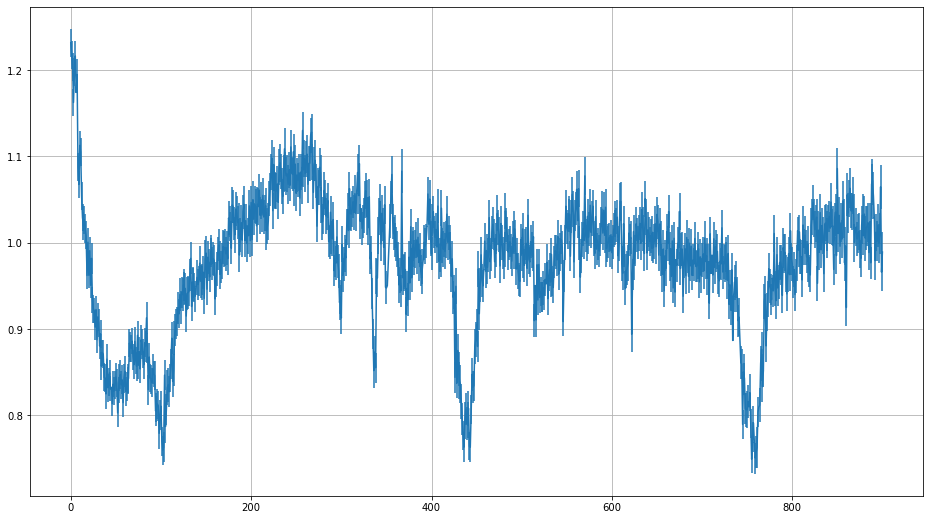

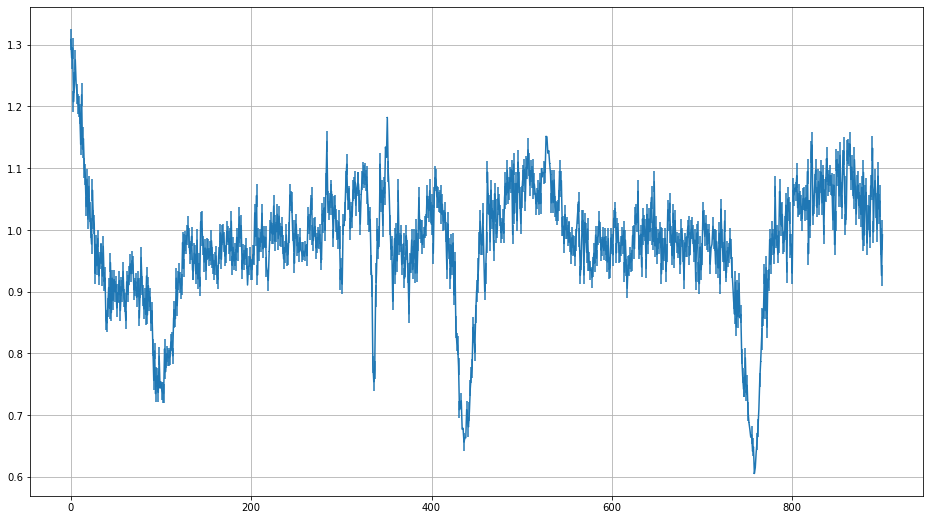

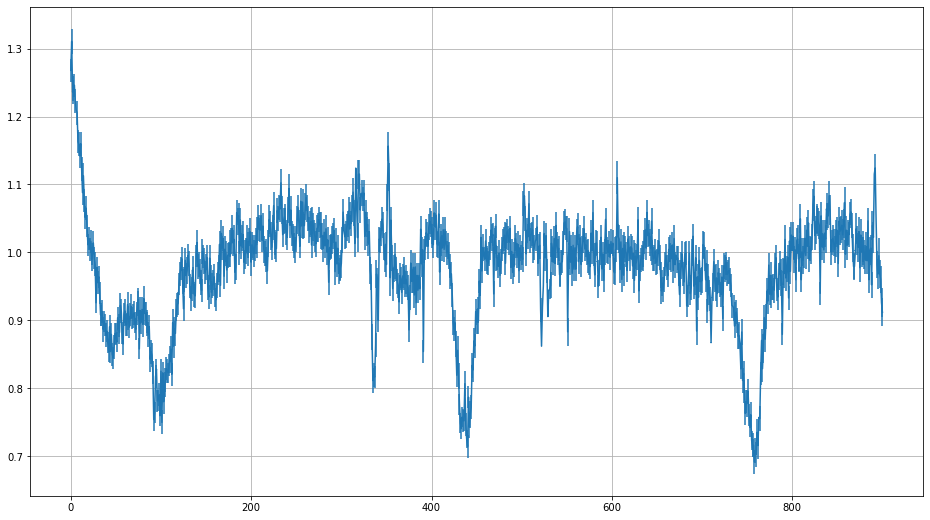

In [28]:
cosmic_files = ['cosmic_normal_sky_sub_2009oct30_0009.fits_flux.dat', \
                'cosmic_normal_sky_sub_2009oct30_0010.fits_flux.dat', \
                'cosmic_normal_sky_sub_2009oct30_0011.fits_flux.dat']

for i in range(len(cosmic_files)):
    cs_pix, cs_fl, cs_fle = np.loadtxt(cosmic_files[i], usecols=(0,1,2), unpack=True)
    plt.figure(figsize=(16,9))
    plt.errorbar(cs_pix, cs_fl, yerr=cs_fle)
    plt.grid()
    #plt.show()